In [2]:
import pandas
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import classifiers
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.tokenize import word_tokenize #import word_tokenize for tokenizing text into words 
import csv
from textblob import TextBlob
from nltk.corpus import stopwords

In [4]:
countpos = 0
countneutral = 0
countneg = 0
countsentence = 0
infile = 'tweet_product.csv'

def stemmingEnglish(str):
    porter_stemmer = PorterStemmer()
    words = word_tokenize(str)
    result = list()
    for word in words:
        result.append(porter_stemmer.stem(word))
        
    return ' '.join(result)


with open(infile, 'r', encoding="utf8") as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        sentence = row[0]
#         print(sentence)
        sentence = sentence.lower() #casefolding
        sentence = re.sub('@[^\s]+','',sentence)   #removeMention
        sentence = re.sub(r"http\S+", '', sentence)  #removeLink
        sentence = re.sub('#\S+', '', sentence)  #removeHashtag
        sentence = re.sub('rt|cc', '', sentence)  #removeRT/cc
        sentence = re.sub('[^a-zA-Z]', " ", sentence) #removeSymbol
        sentence = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', sentence) #removeOneChar
        sentence = re.sub("\s\s+" , " ", sentence) #removeMultiSpace
        sentence = stemmingEnglish(sentence)

        blob = TextBlob(sentence)
        print (sentence)
        print (blob.sentiment.polarity, blob.sentiment.subjectivity)
        if blob.sentiment.polarity > 0 :
            print ("POSITIF")
            countpos=countpos+1
        elif blob.sentiment.polarity == 0 :
            print ("NEUTRAL")
            countneutral=countneutral+1
        else :
            print ("NEGATIF")
            countneg=countneg+1
        print("")
        
        countsentence = countsentence+1
        


tweet text
0.0 0.0
NEUTRAL

have iphon after hr tweet at it wa dead need to upgrad plugin station at
-0.2 0.4
NEGATIF

know about awesom ipad iphon app that you ll like appreci for it design also they re give free ts at
0.4 0.8
POSITIF

can not wait for also they should sale them down at
-0.15555555555555559 0.2888888888888889
NEGATIF

hope thi year festiv isn as crashi as thi year iphon app
0.0 0.0
NEUTRAL

great stuff on fri marissa mayer googl tim reilli tech book confer amp matt mullenweg wordpress
0.8 0.75
POSITIF

new ipad app for and commun are showcas at the confer
0.13636363636363635 0.45454545454545453
POSITIF


0.0 0.0
NEUTRAL

is just sta is around the corner and is onli hop skip and jump from there good time to be an fan
0.7 0.6000000000000001
POSITIF

beauti sma and simpl idea wrote about our ipad app for
0.0 0.0
NEUTRAL

count down the day to plu strong canadian dollar mean stock up on appl gear
-0.011574074074074106 0.5699074074074074
NEGATIF

excit to meet the at so ca


thank to for her mention of our new ipad app be showcas at the conf link
0.13636363636363635 0.45454545454545453
POSITIF

thank to for publish the news of new medic app at the conf blog link
0.13636363636363635 0.45454545454545453
POSITIF

thank to for publish the news of our new medic app in the conf blog link
0.13636363636363635 0.45454545454545453
POSITIF

what doe not provid iphon charger ve chang my mind about go next year
0.0 0.0
NEUTRAL

wonder if amp will be in the appl flashmob tcrn ch fc j
0.0 0.0
NEUTRAL

wonder if is put tip from the api
0.0 0.0
NEUTRAL

xma shini new app new book pop up ipad store is christma for nerd
0.13636363636363635 0.45454545454545453
POSITIF

yai new for now in the app store includ uberguid to sponsor by cont link
0.13636363636363635 0.45454545454545453
POSITIF

ye hey ve got anoth gem for you gt free sxsw link
0.4 0.8
POSITIF

fast fun amp futur of googl present at on search local and mobil
0.125 0.2
POSITIF

gsd amp amp googl industri pay tonight


less than hour until we announc the detail on the ipad giveaway
-0.16666666666666666 0.06666666666666667
NEGATIF

up to ipad seen in the wild both peopl say it is fast but the still pic are terribl
0.15000000000000002 0.5
POSITIF

the ipad queue at of cours
0.0 0.0
NEUTRAL

the take over video by link
0.0 0.0
NEUTRAL

mani ipad snap away at the keynot slide
0.0 0.0
NEUTRAL

appl ha user credit card sync with itun for one click purchas
0.0 0.0
NEUTRAL

have my nd cocktail quot texa snowflak quot googl it at the
0.0 0.0
NEUTRAL

new post iphon app we ll be use at south by southwest interact link
0.13636363636363635 0.45454545454545453
POSITIF

new post iphon app we ll be use at south by southwest interact link
0.13636363636363635 0.45454545454545453
POSITIF

sweet new googl map demo go on in ballroom
0.24318181818181817 0.5522727272727272
POSITIF

more than million mile per day are drive with googl map navig
0.5 0.5
POSITIF

it m and the line at the appl store is longer and wider about 

NEUTRAL

appl store downtown austin open til midnight ani ipad left in stock
0.0 0.25
NEUTRAL

appl store on congress link
0.0 0.0
NEUTRAL

quot the appl store at the mall on sunday is as crowd as thi thi line is fake just need fuck dongl quot geniu let me in
-0.45 0.8
NEGATIF

wk onli appl store in th austin street is now open
0.0 0.5
NEUTRAL

special appl store open at th and congress for sxsw amp ipad launch www appl com retail thedomain
0.17857142857142858 0.5357142857142857
POSITIF

makeshift appl store at th and congress you re kid me amaz
0.0 0.0
NEUTRAL

temporari appl store at huge line link
0.4000000000000001 0.9
POSITIF

temporari appl store at sxsw is realli cool as is the ipad
0.35 0.65
POSITIF

temporari appl store be set up for shit now the temptat is go to be out of control
-0.2 0.8
NEGATIF

temporari appl store for line goe around the block link
0.0 0.0
NEUTRAL

temporari appl store open th amp congress tomorrow
0.0 0.5
NEUTRAL

temporari appl store open at pm at th an

NEUTRAL

great for ceain meet hello holler gram our new ipad app link
0.4681818181818182 0.6022727272727273
POSITIF

dont miss charl chen for android chromeo aess at sxsw the googl booth in exhibit hall pm
0.0 0.0
NEUTRAL

remind charl chen will be talk about android and chromeo aess today pm the googl booth in exhibit hall
0.0 0.0
NEUTRAL

tomorrow charl chen will be speak about android and chromeo aess the googl booth in exhibit hall pm
0.0 0.0
NEUTRAL

re group chat app for now been told to two more app not yet avail on android thi point ll need phone just for app
0.5 0.5
POSITIF

rememb chime in with tweet about your experi between pm pm central time for session link
0.0 0.25
NEUTRAL

the daili chord tuesday march hacker discov googl music servicestori from rollin link
0.0 0.0
NEUTRAL

the daili chord tuesday march hacker discov googl music servicestori from roll stone mo link
0.0 0.0
NEUTRAL

googl to circl austin link
0.0 0.0
NEUTRAL

no googl circl at link ht mayb they re recons

0.0 0.0
NEUTRAL

see facebook and googl as competit via
0.0 0.0
NEUTRAL

ha fantast schedul app for iphon bummer am still crackberri
0.0 0.0
NEUTRAL

photo by far the best aessori is an ipad follow close by margarita link
0.55 0.65
POSITIF

one of my fav photo of so far amp link
0.1 1.0
POSITIF

watch out fb big brother googl to launch major new social network call circl possibl today link
0.05804924242424242 0.2803030303030303
POSITIF

think fell bit more in love with today thank for throw the nerd pay at the speakeasi dure
0.5 0.55
POSITIF

the way figur an ipad is good replac for not make it to thi year
0.7 0.6000000000000001
POSITIF

at dslr film discuss moder by guy kawasaki of appl fame pack hous
0.0 0.0
NEUTRAL

get film red carpet coverag from cw austin star mandi dugan on group in get the app link
0.0 0.0
NEUTRAL

need to find better stream to follow the inan ipad tweet are sure not what southbi is about
0.5 0.6944444444444444
POSITIF

find out if you are stupid with our stupi

0.31666666666666665 0.3527777777777778
POSITIF

googl will connect the digit amp physic world through mobil link
0.0 0.0
NEUTRAL

googl will connect the digit amp physic world through mobil link
0.0 0.0
NEUTRAL

whi googl appl ea game zynga facebook microsoft and intuit went gaga for the go game link
-0.4 0.4
NEGATIF

futur of googl contextu discoveri locat context help us go deeper than ever search without search
0.0 0.0
NEUTRAL

googl cutt say reput and topic are the key that matter in site rank say trust amp lda
-0.4 0.95
NEGATIF

what will googl marissa mayer talk about at woh go
0.0 0.0
NEUTRAL

iron googl the direct to pay and end up walk block in the wrong direct time for bed think
-0.10000000000000002 0.5666666666666668
NEGATIF

check out googletv to ipad app the connect tv experi at sxsw link
0.0 0.0
NEUTRAL

check out googletv to ipad app the connect tv experi at sxsw link fascin
0.0 0.0
NEUTRAL

cnnmoney got crave mind creat an app for that foodspot link
0.0 0.0
NEUTRAL

mic

0.0 0.0
NEUTRAL

the ipad app is pure gold
0.21428571428571427 0.5
POSITIF

check out ipad design headach tablet call in the morn at sxsw link
0.0 0.0
NEUTRAL

first up ipad design headach tablet call in the morn
0.25 0.3333333333333333
POSITIF

the first ipad didn even exist here last year and alreadi feel like pull out an antiqu everytim use my ipad
0.125 0.19999999999999998
POSITIF

design ipad interfac new navig schema
0.13636363636363635 0.45454545454545453
POSITIF

design ipad interfac with link
0.0 0.0
NEUTRAL

turn your ipad into physic messag platform with holler gram cheeki app we built for link
0.0 0.0
NEUTRAL

spin play ipad launch pay hang with and cedar street couyard link
0.0 0.0
NEUTRAL

shoot my ipad will not display ani search result will have to go through question later
0.0 0.0
NEUTRAL

pic of my ipad win perform link
0.8 0.4
POSITIF

fear no iphon gs slowpok network dure amp
0.0 0.0
NEUTRAL

the iphon app is mock me like have the money to be there come on
0.0 0.0
N

0.2330492424242424 0.40530303030303033
POSITIF

googl to launch major new social network call circl possibl today link of cours anoth social network
0.06638257575757575 0.271969696969697
POSITIF

googl to launch major new social network call circl possibl today link
0.0773989898989899 0.34040404040404043
POSITIF

googl to launch major new social network call circl possibl today link
0.0773989898989899 0.34040404040404043
POSITIF

googl to launch major new social network call circl possibl today link via
0.0773989898989899 0.34040404040404043
POSITIF

googl to launch major new social network call circl possibl today link via
0.0773989898989899 0.34040404040404043
POSITIF

googl to launch major new social network call circl possibl today link via
0.0773989898989899 0.34040404040404043
POSITIF

googl to launch major new social network call circl possibl today link via
0.0773989898989899 0.34040404040404043
POSITIF

googl to launch major new social network call circl possibl today link via

hootsuit mobil for updat for iphon blackberri amp android link
0.0 0.0
NEUTRAL

hootsuit mobil for updat for iphon blackberri amp android link via
0.0 0.0
NEUTRAL

hootsuit mobil for updat for iphon blackberri amp android link
0.0 0.0
NEUTRAL

hootsuit mobil for updat for iphon blackberri amp android link
0.0 0.0
NEUTRAL

hootsuit mobil for updat for iphon blackberri amp android link via
0.0 0.0
NEUTRAL

hootsuit mobil for updat for iphon blackberri amp android share by paul link
0.0 0.0
NEUTRAL

hootsuit mobil for updat for iphon blackberri amp android whether you re get friendli down at link
-0.15555555555555559 0.2888888888888889
NEGATIF

mashup on mobil with contextu inform in the futur by by marissa mayer
0.0 0.0
NEUTRAL

there are more than few pat here at if you don know what talk about pleas googl julia sweeney and learn
0.15 0.3
POSITIF

well good morn day readi for anoth day of great panel bc alumni amp the industri pay tonight
0.75 0.675
POSITIF

love my morphi juicepack tod

confus over googl circl googl claim circl is not be releas at and is not even in develop link
0.0 0.0
NEUTRAL

pack point by show iphon fragment
0.0 0.0
NEUTRAL

attend panel quot better live through cloud comput quot present by googl jon wiley
0.21212121212121213 0.3333333333333333
POSITIF

one panel moder who is from the europ say he spent in roam charg on hi iphon at sxsw
-0.1 0.1
NEGATIF

the brown paper on the window as the line grow at the popup appl store by gold gym at sixth amp congress link
0.0 0.0
NEUTRAL

two pai down awesom journal npr googl one to go pb
-0.15555555555555559 0.2888888888888889
NEGATIF

at googl pay best ever get your butt over here
1.0 0.3
POSITIF

hey peep our new iphon app on just launch the us link check it out and let us know what you think
0.13636363636363635 0.45454545454545453
POSITIF

watch how peopl interact with inform it be differ bigger smaller and or
0.0 0.5
NEUTRAL

hey peopl surviv tip no great vegitarian vegan right in the think of the acti


so just spill the bean next platform for flipboard is the iphon team sta work on it
0.0 0.0
NEUTRAL

so just spill the bean next platform for flipboard is the iphon team sta work on it gr
0.0 0.0
NEUTRAL

so of you amp you have the new ipad
0.13636363636363635 0.45454545454545453
POSITIF

impress so far with the ipad slim form and quot instant on quot ness that ve seen haven tri one myself yet
0.05 0.8333333333333333
POSITIF

there are so mani ppl appl product at think my head is about to explod thi messag brought to you via iphon
0.0 0.0
NEUTRAL

is so sma to open pop up store in while crowd there
0.0 0.5
NEUTRAL

so come dwnld app amp ride for in austin dure sxswi link see us booth
0.0 0.0
NEUTRAL

q whi do social site like delici often have better result than googl or bing
0.26666666666666666 0.2833333333333333
POSITIF

ipad is sold out and were st time user
0.0 0.0
NEUTRAL

we ve got some excit thing that we ll be show off at thi year includ drag and drop store manag on your iphon


the top thing ve love about so far link
0.3666666666666667 0.7000000000000001
POSITIF

like to think appl decid to sell their new ipad at base on my suggest link everyon you are welcom
-0.33181818181818185 0.7272727272727273
NEGATIF

if anyon think go to be walk around at with an old and inferior ipad onc the ipad is releas well they are wrong
-0.2 0.55
NEGATIF

peopl in thi appl store do not smell great
0.8 0.75
POSITIF

check out thi new app we re use it to check out link
0.13636363636363635 0.45454545454545453
POSITIF

peopl in thi session are take photo with their ipad up in the air
0.0 0.0
NEUTRAL

check out thi video to get glimps at what the action wa like the ipad link
0.1 0.1
POSITIF

check out thi video to get glimps at what the action wa like the ipad link could not resist
0.1 0.1
POSITIF

in austin thi wk amp need your or fix find the guy the sign on the hilton cnr near conventionctr link
0.1 0.4
POSITIF

we miss thi check out googl doodl burn man to pac man and beyond lin

NEUTRAL

want to use thi video in my talk today but need to be abl to download it to my ipad do you know how link
0.0 0.0
NEUTRAL

use s ipad app as an exampl of good navig link
0.7 0.6000000000000001
POSITIF

is anyon use googl checkin thru latitud
0.0 0.0
NEUTRAL

argh the ux meet up is at the exact same time as the iphon dev meetup where is my clone
0.125 0.1875
POSITIF

they have veri littl need for parent anymor comment on child play with ipad
0.0 0.0
NEUTRAL

video interview with amp at quot googl deal quot link
0.0 0.0
NEUTRAL

took some video on ipad on th street the sma cover is rad film on the huge display is nut look great on playback
0.6000000000000001 0.825
POSITIF

sweet tea vodka out of glowstick cup doesn scream quot googl quot to me but it is baller
0.35 0.65
POSITIF

my ipad vs android panel sta at at radisson bloodi mari sta now
0.0 0.0
NEUTRAL

thi waze vs googl discuss is one of the best have seen at we need more competitor go head to head here
0.75 0.4
POSITIF

de

POSITIF

yesterday left the hous without my phone then forgot to charg ipad overnight
0.0 0.0
NEUTRAL

next year go to set up bootleg sidewalk ca in austin and sell macbook power adapt and iphon cabl oh and red bull
-0.13333333333333333 0.3
NEGATIF

at midday iphon at mid batteri thi outlet block by an immobil booth serv no purpos but to taunt me link
0.0 0.0
NEUTRAL

wow folk make sure that iphon ringer is turn all the way up when have to be up pre sunris for flight
0.3 0.9444444444444444
POSITIF

who know mayb will do it are you go to gari talk wish could be there iphon me clip if you go
0.0 0.0
NEUTRAL

no fear no envi no mean no lie no hypocrisi link
0.15625 0.6875
POSITIF

sorri not go to the pay at iphon forev
0.0 0.0
NEUTRAL

sxsw tip princ npr video toy shop with zuckerberg link
0.0 0.0
NEUTRAL

great job siva brief aount of my talk quot be evil quot link
-0.06666666666666665 0.6944444444444443
NEGATIF

booth there is still time for the power challeng ride the bike get bottl en

0.0773989898989899 0.34040404040404043
POSITIF

brilliant hope they have plenti of ipad appl to open pop up shop at sxsw repo link
0.45 0.75
POSITIF

if had for each iphon pictur of the registr queue taken in the past min could hire someon to wait in my place
-0.25 0.25
NEGATIF

ragtub com my way link redcross chuck greenberg tokyo hurrican katrina crescent citi ipad
0.0 0.0
NEUTRAL

new www divasanddork com appl ipad invad link
0.13636363636363635 0.45454545454545453
POSITIF

new www divasanddork com best of both world appl pop up store invad sxsw link
0.5681818181818181 0.37727272727272726
POSITIF

hurrah the festiv have begun met some mozilla and googl folk tonight at event
0.0 0.0
NEUTRAL

goodguid iphon app scan barcod to rank environment respons of the compani nice pressur
-0.10000000000000003 0.95
NEGATIF

think get readi to order an ipad with the would have had to spend to attend
0.0 0.0
NEUTRAL

think go to get second iphon just to view push notif
0.0 0.0
NEUTRAL

in fact go t

0.25 0.3333333333333333
POSITIF

yay flipboard next platform will be the iphon ceo say
0.0 0.0
NEUTRAL

get go to work yet ve been tri for day
0.0 0.0
NEUTRAL

great to meet you meetup thi is the post about our new medic app link
0.4681818181818182 0.6022727272727273
POSITIF

nice get readi for my ipad vs android panel at come check it out at
0.6 1.0
POSITIF

score googl hand out free pi for pi day
0.4 0.8
POSITIF

whoa googl to launch major new social network call circl possibl today link
0.0773989898989899 0.34040404040404043
POSITIF

cool heard about appl pop up store in downtown austin pic are alreadi on gowalla link
0.35 0.65
POSITIF

nice hey appl fan get peek at the space that slate to be pop up appl store tomorrow link
0.6 1.0
POSITIF

read your book on my flight to and the guy next to me is read it on the ipad boom
0.0 0.0
NEUTRAL

is here at the industri pay present by amp in austin tx for
0.0 0.0
NEUTRAL

haha if you haven wait in line for an appl product you re miss out on 

0.0 0.0
NEUTRAL

whi not appl store sxsw link
0.0 0.0
NEUTRAL

chri saa tweet out fake beta invit follow swarm ensu link
-0.5 1.0
NEGATIF

download qrank on your ipad iphon befor you come to pubcamp sxsw prize
0.0 0.0
NEUTRAL

download qrank on your ipad iphon befor you come to pubcamp sxsw prize
0.0 0.0
NEUTRAL

score juic pack at the doubl your iphon batteri
0.0 0.0
NEUTRAL

lightbox want to be your new link
0.13636363636363635 0.45454545454545453
POSITIF

with listen to and talk about websit rank with googl and bing
-0.8 0.9
NEGATIF

oh yeah flipboard next platform will be the iphon ceo say via
0.0 0.0
NEUTRAL

at and realli want to win sn ipad
0.8 0.4
POSITIF

free tunag on itun link
0.4 0.8
POSITIF

quot you can googl canadian tuxedo and lose yourself for hour quot
0.0 0.0
NEUTRAL

heard at is now the lead market share of sma phone in us
0.0 0.0
NEUTRAL

link
0.0 0.0
NEUTRAL

defin languag of touch with differ dialect becom smaller
0.0 0.5
NEUTRAL

who are foursquar competitor goo

0.25 0.3333333333333333
POSITIF

the ipad take over video link
0.0 0.0
NEUTRAL

the ipad take over video link via
0.0 0.0
NEUTRAL

the ipad take over video link
0.0 0.0
NEUTRAL

the ipad take over video link via mashabl
0.0 0.0
NEUTRAL

the ipad take over sxsw video link
0.0 0.0
NEUTRAL

the ipad take over sxsw video link
0.0 0.0
NEUTRAL

get over free track from the music sampler ha track on there check it out link
0.4 0.8
POSITIF

download free track from the music sampler on includ link
0.4 0.8
POSITIF

download free track from the music sampler on includ link
0.4 0.8
POSITIF

download free track from the music sampler on includ link
0.4 0.8
POSITIF

my new iphon app page what miss see ani breakout link
0.13636363636363635 0.45454545454545453
POSITIF

stoke free song from itun link my person favorit baon hollow by
0.15000000000000002 0.42500000000000004
POSITIF

we re at nd and congress with bookbook ipad case get here fast
0.2 0.6
POSITIF

amp vs amp quot groupon or live social typ

ipad design headach take two tablet and call me in the morn link
0.0 0.0
NEUTRAL

doubl ipad dj full on across the sky link
0.35 0.55
POSITIF

not bad idea link
0.3499999999999999 0.6666666666666666
POSITIF

alreadi had my first googl circl search result link
0.25 0.3333333333333333
POSITIF

so the ipad will be avail while in austin for thi is major
0.0625 0.5
POSITIF

get temporari for appl is set up temporari store in austin link
0.0 0.0
NEUTRAL

win an ipad by sign up here link
0.8 0.4
POSITIF

ipad well is dri at the pop up store
0.0 0.0
NEUTRAL

ipad is come for you will you buy appl to open store near sxsw for ipad releas link
0.05 0.45
POSITIF

buy ipad turn in ur ipad appl store wipe it clean donat to school mr job idea
0.3666666666666667 0.7000000000000001
POSITIF

beyondbroadcast busi model is the platform iphon app make tool link
0.0 0.0
NEUTRAL

just load up the groupm app for the iphon load me up brethren link
0.0 0.0
NEUTRAL

monday adfon daili is out read about white rel

comput and droid here my confess use laptop ipad and blackberri to follow from afar to see
0.0 0.0
NEUTRAL

at and have time better luck with my verizon air card than my at amp iphon
0.5 0.5
POSITIF

and did quot south by quot drive by for thi babi what an adventur link
0.0 0.0
NEUTRAL

oh sure and don arriv till tomorrow googl set to launch new social network today at
0.22323232323232323 0.47003367003367
POSITIF

all tech and interact event have their own ipad app right link
0.44285714285714284 0.7678571428571428
POSITIF

at and need to get your ipad right away appl is open pop up store for you at west th amp congress link
0.14285714285714285 0.5178571428571428
POSITIF

check in and offer through googl cool link
0.35 0.65
POSITIF

at and want to win an ipad get on the case with and
0.8 0.4
POSITIF

wa he stand talent eww amp lol just saw guy tweet on hi ipad while pee thi is
0.8 0.7
POSITIF

android dev link
0.0 0.0
NEUTRAL

complet android guid print on sale at bookstor today includ 


arg it won load on me iphon not via the app store or the site just tri to it and am feelin so out of touch
0.0 0.0
NEUTRAL

had to charg the everi hour here on run it on lowest possibl screen bright appl fix your basic
0.35000000000000003 0.46249999999999997
POSITIF

iphon charg at link
0.0 0.0
NEUTRAL

iphon charg pay in the hallway ux and ia profession unit
0.0 0.0
NEUTRAL

we are gear up for the interact trade show we are across from googl link
0.0 0.0
NEUTRAL

iphon share
0.0 0.0
NEUTRAL

arriv earli to get prime seat for present by googl marissa mayer kek
0.0 0.0
NEUTRAL

the line around the austin appl pop up store unbeliev
0.0 0.0
NEUTRAL

man get arrest at for not have an iphon link
-0.05 0.0
NEGATIF

rachael harri that who saw that wa drive me nut thank you googl
0.0 0.0
NEUTRAL

go to bar and get free drink becaus have an iphon
0.4 0.8
POSITIF

thank marshal jone for the head up appl to open temporari store for at th and congress link
0.0 0.5
NEUTRAL

such sma idea w t wrote


save driver time and fuel link
0.0 0.0
NEUTRAL

matthew davi design for ipad quot the web ha been like strip mall of content quot
0.0 0.0
NEUTRAL

think saw or lookalik in line for ipad appl pop up shop at he got an awesom amp veri profit youtub channel
0.0 0.0
NEUTRAL

ipad giveaway for use at link
0.0 0.0
NEUTRAL

step away from the comput leav my iphon in the den have good avro
0.7 0.6000000000000001
POSITIF

win thi awesom ipad from quibid and custom case if we catch you at wear an openbeta vip badg
0.8 0.4
POSITIF

awesom trade in last year for the ipad
0.0 0.06666666666666667
NEUTRAL

haha awesom rad ipad app by link via
0.2 0.3
POSITIF

haha awesom rad ipad app by link via
0.2 0.3
POSITIF

piec of awesom arduino android flame skull link
0.0 0.0
NEUTRAL

today amp hi iphon game and amp more and more celeb brand destin
0.19999999999999998 0.4666666666666666
POSITIF

dude may actual buy an ipad tomorrow appl will have temporari store in downtown austin for link
0.0 0.1
NEUTRAL

gi

NEUTRAL

bpm dj ipad app is power thi pay republ live link
0.13636363636363635 0.5
POSITIF

at left brain search googl right brain search at sxsw link
0.14285714285714285 0.26785714285714285
POSITIF

come celebr austin with googl and gsd amp at sxsw hotpot blog link
0.0 0.0
NEUTRAL

come celebr chariti water tonight googl is throwin the pay jump sta your week off right studentsforcleanwat org rsvp
0.2857142857142857 0.5357142857142857
POSITIF

brian actual austin doesn have an appl store but there is rumor they built pop up one link for
0.0 0.1
NEUTRAL

should bring my ipad and macbook air or just my air on the to
0.0 0.0
NEUTRAL

the last broadcast or your mom ha an ipad
0.0 0.06666666666666667
NEUTRAL

want gun bro for android want to play it on find me for download card link
0.0 0.0
NEUTRAL

play gun bro on an xperia play at googl leagu event and park lot of event on sunday
0.0 0.0
NEUTRAL

googl lab fusion tabl made elect day foursquar visual possibl pr
0.4 0.45
POSITIF

pubsubhubb

POSITIF

time for coffe muffin and news read with lenewz at trade show booth just behind googl
-0.4 0.7
NEGATIF

come by tomorrow to get your iphon case link
0.0 0.0
NEUTRAL

after come visit milyoni we are at booth right under the big googl sign at link
0.14285714285714285 0.31785714285714284
POSITIF

my first comput as kid wa an atari my kid first comput will be an ipad what will they be abl to do that couldn
0.25 0.3333333333333333
POSITIF

crowdbeacon ha put togeth guid to at link the latest updat to their iphon app is go to be sick
-0.10714285714285715 0.8785714285714286
NEGATIF

on it second day in busi the appl pop up store appear to be trend appl store sxsw pic link
0.0 0.0
NEUTRAL

at conf and out of everi peopl have mac or ipad includ me what happen to the pc is it becom obsolet
0.0 0.0
NEUTRAL

at conf and everyon ha mac or ipad includ me what happen to the pc is it becom obsolet
0.0 0.0
NEUTRAL

congrat on the first ipad at
0.25 0.3333333333333333
POSITIF

congrat on your i

0.0 0.0
NEUTRAL

now poke like and re tweet googl love stori alisa icross
0.5 0.6
POSITIF

ballroom talk about some cool project obv love the googl project
0.425 0.625
POSITIF

all pack charg the ipad for busi day weekend ahead also need to download the app for iphon ipad
0.0 0.0
NEUTRAL

ipad found my friend jeff ha it thank to everyon who help especi
0.0 0.0
NEUTRAL

all pack few too mani devic alarm set for am see ya ll at psych to meet final mani of you guy
-0.1 0.55
NEGATIF

whi should shouldn get an ipad discuss
0.0 0.0
NEUTRAL

first ipad sight at interact infact everyon ha at least appl product in use at all time
-0.024999999999999994 0.3666666666666667
NEGATIF

ipad win it here link
0.8 0.4
POSITIF

download daili grape new app from for the iphon you can take him with you to the wine shop
0.13636363636363635 0.45454545454545453
POSITIF

dan die maar doen p ipad store sold out of everyth except gig wifi onli white
0.0 0.0
NEUTRAL

the most danger ipad in my life link jaquelin b

-0.012499999999999997 0.6875
NEGATIF

take the plung at the pop up store on congress
0.0 0.0
NEUTRAL

waze link is duke it out with googl re person map experi friendli quot panel crash quot
0.0 0.0
NEUTRAL

find where is play at on the app for android we got link
0.0 0.0
NEUTRAL

off to see in quot left brain search googl right brain search quot panel at
0.14285714285714285 0.26785714285714285
POSITIF

srsli love promo srsli hate that it exclud esp sinc my ipad insist at disney
-0.15000000000000002 0.75
NEGATIF

the googl aclu pay tonight at is the best thing ever and appar the spazmat are franchis band but they rock
1.0 0.3
POSITIF

realli the quot googl me quot is now go to be call quot circl quot hmm we will see later today at
0.0 0.0
NEUTRAL

what the entrepreneur win tech award at for link via
0.8 0.4
POSITIF

new googl would have more nuanc share but say no launch immin link later today at
0.21212121212121213 0.3181818181818182
POSITIF

onli white gig wifi avail at popup store ri

0.1 1.0
POSITIF

the googl map app save my life on regular basi map ha million user of user are mobil
0.0 0.07692307692307693
NEUTRAL

think ve mess up my mexican iphon by tri to updat softwar for app fittingli the screen is stuck in mode
-0.0875 0.0875
NEGATIF

one of the most in your face ex of steal the show in yr quot at appl school the mkt exp quot link
0.5 0.5
POSITIF

get to the nav scheme am done with the ipad shape lesson
0.0 0.0
NEUTRAL

love the new iphon suggest come from
0.3181818181818182 0.5272727272727272
POSITIF

omg tabl next to us is pass around the ipad
0.0 0.0
NEUTRAL

the leagu of extraordinari cker present by lightn talk on technolog speakeasi link
0.0 0.0
NEUTRAL

the futur of googl map out at kia recal and more top adveis news link
0.5 0.5
POSITIF

z ounc of prevent link code valid p
0.0 0.0
NEUTRAL

the futur of read onlin is custom amp share not tablet link
0.0 0.0
NEUTRAL

tim get me one appl employe just show up in forc to the popup appl store
0.0 0.0
NEUTR

0.35 0.65
POSITIF

alreadi the big winner at link
0.0 0.1
NEUTRAL

get readi to hear about the road map from vp product marissa mayer pl tell me you re go to focu on search
0.0 0.0
NEUTRAL

real time locat data as layer on googl eah give breathtak visual data
0.1 0.15000000000000002
POSITIF

never realiz how shitti by iphon batteri wa until charg everi few hour
-0.2 0.1
NEGATIF

thi realli put the whole releas and in perspect doesn it
0.2 0.4
POSITIF

am so jealou of becaus she at that am not send her tweet to my iphon until it over
0.0 0.0
NEUTRAL

steal the show again with pop up at link
0.0 0.0
NEUTRAL

can stream on my ipad on sxsw go
0.0 0.0
NEUTRAL

met the team that set up the appl store set up whole place from noth in day great work
0.5 0.575
POSITIF

nice to hear that mint com is work on an ipad app
0.6 1.0
POSITIF

enjoy learn about experiment product strategi fr link
0.4 0.5
POSITIF

so it appear appl is open pop up store in austin for the employe were tri to hide it the bee

how the hell am suppos to get the new ipad when am stumbl around austin dure
0.13636363636363635 0.45454545454545453
POSITIF

can help but wonder if appl sent extra ipad to austin area store
0.0 0.1
NEUTRAL

ll be help at for the twitter for good at at icenhaur come and join us link
0.7 0.6000000000000001
POSITIF

goal funnel in googl analyt to track registr
0.0 0.0
NEUTRAL

safe travel everyon make sure to get your free gogo inflight wifi and sign up for the freshbook shuttl link
0.4666666666666666 0.7296296296296297
POSITIF

insan jealou of everyon with an ipad here at seem like great way to interact with the panel next year p
0.4 0.375
POSITIF

email me so can dd you to googl document need english speak twitter advoc worldwid event
0.0 0.0
NEUTRAL

temporari appl store is just like real store by zbowl link
0.2 0.30000000000000004
POSITIF

appl temporari megastor at could be model for futur confer event link
0.0 0.0
NEUTRAL

googl seem to have sabotag my youtub aount wtf are they tri

peep the awesom product video can compet with these game link
-0.4 0.4
NEGATIF

oh no utter fail can see the letter of the ballroom in the iphon app as it is too long and doesn wrap
-0.18333333333333335 0.5666666666666665
NEGATIF

ipad owner alreadi punch android user sweet serious excit for thi session
0.008333333333333331 0.6583333333333333
POSITIF

time warner cabl to roll ipad app with live tv on march link
0.13636363636363635 0.5
POSITIF

life hacker debut steampunk ipad ft reclaim copper pipe one mini maglight and quot kinda thin quot etch sketch interfac
-0.4 0.8500000000000001
NEGATIF

new twitter friend about to take on googl amp bing on what els seo
0.13636363636363635 0.45454545454545453
POSITIF

an engin from googl chrome just came up to correct some misstat about the browser awesom
0.0 0.0
NEUTRAL

ever wonder how googl map captur those street view link
0.0 0.0
NEUTRAL

mega tether iphon android pay with and
0.0 0.0
NEUTRAL

brown paper is come down on the window of the po


quot someth ventur quot is great it ha some great stori in it includ genentech appl and cisco
0.8 0.75
POSITIF

wow someth ventur wa kick ass film googl or blekko it for detail good choic
0.39999999999999997 0.8
POSITIF

youtub get view day are mobil hour of video upload everi minut googl leagu of extraordinari hacker
0.0 0.0
NEUTRAL

tweet who is android user and attendong sxsw pleas repo scene with bannka app link
0.0 0.0
NEUTRAL

is sxsw get it own appl store sxsw babi link
0.6 1.0
POSITIF

are you get one line for the ipad at the appl store no demo unit until pm link
0.0 0.0
NEUTRAL

fast societi is readi to pay at sxsw exclus demo video link
0.2 0.6
POSITIF

forget queue for the mashabl and googl pai the best option at pm is definit the redlas pay with chromeo
1.0 0.3
POSITIF

ipad queue is epic link
0.1 0.4
POSITIF

quoi de neuf sur what new with blogger offici blog link
0.13636363636363635 0.45454545454545453
POSITIF

android develop and friend let hang out saturday at link for


the line for the ipad at link
0.0 0.0
NEUTRAL

the line for the ipad at the pop up appl store ha been outlandish the entir week
0.0 0.0
NEUTRAL

for the life of me can get my ipad to sync all the session onli paial iphon is fine ipad is decid what it want
0.4166666666666667 0.5
POSITIF

googl befor you tweet thi might be stupid question but what exactli is at thi
-0.7999999999999999 1.0
NEGATIF

founder confirm new iphon to be out in summer
0.13636363636363635 0.45454545454545453
POSITIF

foursquar is push their iphon android app heavili here at wish they gave your webo client equal bill
0.0 0.25
NEUTRAL

ze frank miss the childhood walk project with googl street view enabl stun revel link
0.0 0.0
NEUTRAL

free featur aist sampler on itun link
0.4 0.8
POSITIF

friend told me you were talk about sma bike at check out bit ly awa we will be at googl with prototyp
0.0 0.0
NEUTRAL

while my friend are in austin ll be in buffalo for the new so there
0.13636363636363635 0.45454545454545453
P

POSITIF

ok so googl circl is not offici go to launch at but no denial that it exist
0.5 0.5
POSITIF

thi circl ha everyon go around in circl link
0.0 0.0
NEUTRAL

trend googl circl googl circl new social site in the work will not debut but doe not deni the ex
0.08484848484848484 0.2606060606060606
POSITIF

quot googl ha too mani product and need to condens them quot fyi they have nine mobil product
0.0 0.0
NEUTRAL

quot googl in few year as an ai will ask us whi do you want to know that quot
-0.2 0.1
NEGATIF

could googl just buy that one way we could work togeth say our api are anoth
0.0 0.0
NEUTRAL

quot googl look for technic solut which whi they re not great at commun becaus it human solut quot
-0.2 0.425
NEGATIF

quot googl map is the best true dat doubl true quot link
0.5666666666666668 0.5333333333333333
POSITIF

googl map is even cooler than thought
0.0 0.0
NEUTRAL

quot googl map rout around traffic is save our user year everi day quot marissa mayer
0.0 0.0
NEUTRAL

googl pay

POSITIF

befor it even begin win over the past week there been major dilemma in link
0.2041666666666667 0.3833333333333333
POSITIF

googl to launch new social network at repo claim googl might use sxsw event thi link
0.08484848484848484 0.2606060606060606
POSITIF

techcrunch appl open pop up store in austin for sxsw link
0.0 0.5
NEUTRAL

lunch with at view from the html dev trench android is pain io is sleek for what is do
0.0 0.0
NEUTRAL

taken with an iphon link
0.0 0.0
NEUTRAL

open graph did repair the damag googl did to the titl tag
0.0 0.5
NEUTRAL

pay with dj do jo play with red bull bpm on ipad link
0.0 0.0
NEUTRAL

wow much hirer than expect of googl map use is mobil
0.15000000000000002 0.6
POSITIF

last month it wa discovr for ipad at thi time it discovr for iphon at climb the app store cha link
0.0 0.06666666666666667
NEUTRAL

link ohh marrisa peopl are hate on you huh
-0.8 0.9
NEGATIF

come watch me make an ass of myself at the ipad android world panel radisson pm
0.0 0.0
N

0.0 0.0
NEUTRAL

found thi emili white on in the music busi iphon app link
0.0 0.0
NEUTRAL

conan to hi asst lot of hipster here she look for man fedora and an ipad lol
0.8 0.7
POSITIF

it hold hi iphon which he use for chang visual fun panel intrigu by marcin powerglov
0.15 0.1
POSITIF

imagin thi is onli sight ok dure homeless guy panhandl for an ipad america is fuck link
0.04999999999999999 0.55
POSITIF

wait thi line ha been awesom becaus of the south african conting link
0.0 0.0
NEUTRAL

threw thi togeth to keep on my ipad to attempt to keep up with all the after hour stuff thi weekend link
0.0 0.0
NEUTRAL

appl white earbud good symbol of our need for social proof when the ipod launch we all knew who had new toy
0.2174242424242424 0.28030303030303033
POSITIF

eightbit hit the street run with html power sxsw just got lot more fun link
0.4 0.35
POSITIF

hmmm think about borrow an ipad from work for take note at work well enough that don have to lug the mbp
0.0 0.5
NEUTRAL

hmmmm li

-0.25 0.8888888888888888
NEGATIF

dang it ve touch an ipad want sigh
0.0 0.0
NEUTRAL

menia at check the live feed of photo at appl store sxsw link
0.13636363636363635 0.5
POSITIF

new social network gt we interrupt your regularli schedul geek program with big news link
0.05656565656565656 0.20707070707070707
POSITIF

josh william said farmvil suess wa wakeup call about game quot what can we build now quot iphon wa were thing were go
-0.4 0.4
NEGATIF

totalitarian thought in action peopl worldwid come to austin tx for and decid to spend their time in line at an appl store
0.1 0.1
POSITIF

hipstamat free sxsw pack march link
0.4 0.8
POSITIF

free sampler from link
0.4 0.8
POSITIF

free music compil sxsw featur aist link
0.4 0.8
POSITIF

ladi alic appl siggi skyr epic snack
0.1 0.4
POSITIF

the unoffici sxsw app showcas link
0.0 0.0
NEUTRAL

great aicl on possibl futur social media the next twitter link
0.2777777777777778 0.2722222222222222
POSITIF

redicul overflow line for ipad session

0.0 0.0
NEUTRAL

cameron sinclair spearhead japan disast relief from via twitter amp iphon link
0.0 0.0
NEUTRAL

a find love link
0.5 0.6
POSITIF

longest line at the appl store of cours link
0.0 0.0
NEUTRAL

wait in line at appl store for ipad
0.0 0.0
NEUTRAL

in line at temp sq ft store for new in austin
0.13636363636363635 0.45454545454545453
POSITIF

still line at the ipad factori link
0.0 0.0
NEUTRAL

omg the line for the ipad at austin appl store is long alot of badg link
-0.05 0.4
NEGATIF

line of about outsid appl pop up store at sixth amp congress
0.0 0.0
NEUTRAL

whi you line peopl be so dull get off your iphon and talk to the person next to you
-0.14583333333333334 0.25
NEGATIF

and the line sta for the pop up store at link
0.0 0.0
NEUTRAL

mad mad line still at the appl pop up store here in austin
-0.625 1.0
NEGATIF

block lineup for ipad
0.0 0.0
NEUTRAL

the geek influenc hit new high yesterday when appl open pop up store at for the sale of the ipad link
0.0987878787878788

0.14285714285714285 0.5178571428571428
POSITIF

new for now in the app store includ uberguid to link
0.13636363636363635 0.45454545454545453
POSITIF

travel to with your ipad is so
0.0 0.0
NEUTRAL

travel to with your ipad is so via
0.0 0.0
NEUTRAL

tuh new for now in the app store includ uberguid to sponsor by link
0.13636363636363635 0.45454545454545453
POSITIF

vip the appl store
0.0 0.0
NEUTRAL

the onli news at sxswi wa appl temporari ipad store ye think of it as the ultim offsit trade show quot booth quot
0.0 0.0
NEUTRAL

registr to android market ha been approv
0.0 0.0
NEUTRAL

last session today left brain search googl right brain search x
0.09523809523809523 0.20079365079365077
POSITIF

hey twitter need way for us in disast area to filter out thing like and too becaus right now we realli don care
0.2857142857142857 0.5357142857142857
POSITIF

hey we re at the grill too whi don you come by you can creat customiz iphon case for tweet
0.0 0.0
NEUTRAL

hey whi not roll tractor tra

lot of geosoci news today begin googl fire shot at foursquar with check in reward link
0.0 0.0
NEUTRAL

surpris the local news in austin hasn mention the traffic implic of the appl pop up store that launch today at
0.0 0.0
NEUTRAL

mani publish ipad content enhanc are like th worst david foster wallac footnot kinda interest but mostli irrelev
-1.0 1.0
NEGATIF

the fiendishli clever pop up appl store now sell ipad s appl store sxsw link
0.16666666666666666 0.8333333333333334
POSITIF

iphon crisi at phone is stuck on silver logo screen ha been for last minut help
0.0 0.06666666666666667
NEUTRAL

play risk on ipad at microsoft booth while rep talk with bbc repoer about kinect and tran devic connect
0.0 0.0
NEUTRAL

did you miss googl vp of search marissa mayer last week listen to the interview here link
0.0 0.06666666666666667
NEUTRAL

love marissa mayer answer to question about her favorit not googl product anoth ami ice cream ref and her swiss watch
0.5 0.6
POSITIF

miss marissa mayer y

tech check podcast pass big twitter link by
0.0 0.1
NEUTRAL

tech check podcast south by southwest android pass blackberri big twitter fail link
-0.25 0.19999999999999996
NEGATIF

two week pop up store in downtown austin just in time for and ipad veri cool
0.35 0.65
POSITIF

first book purchas for the new ipad quot thank you economi quot can wait for him to thi afternoon
0.19318181818181818 0.3939393939393939
POSITIF

c check the head link code valid p
0.0 0.0
NEUTRAL

josh clark hate the ipad back button with the heat of million sun
-0.4 0.45
NEGATIF

josh clark ipad ui talk is fabul full of object critiqu and insight suggest link
0.35 0.55
POSITIF

join link and sta tonight the person with the most friend in their citi by end of festiv win an ipad
0.65 0.45
POSITIF

join link most friend in ur citi end of win an ipad mon help our chng the world
0.65 0.45
POSITIF

the hannukah miracl of the morn uncharg iphon still at batteri
0.0 0.0
NEUTRAL

googl take googl circl may be announc toda


will googl circl take on facebook link
0.0 0.0
NEUTRAL

lol erect temporari appl store in for to sell link
0.8 0.7
POSITIF

ani fan in town for stop by the austin gtug meet wednesday the th at pm map link link
0.0 0.0
NEUTRAL

next battl for bank are mobil phone oper and googl amp appl
0.0 0.0
NEUTRAL

chri pool from chan recommend you googl refriger magnet game veri cute share experi game
-0.10000000000000002 0.6
NEGATIF

appl head to set up temporari store in austin link
0.0 0.0
NEUTRAL

more ipad per capit at then anywher els in the world except for foxconn
0.5 0.5
POSITIF

quot appl is the most eleg fascist compani in america quot
0.5 0.5
POSITIF

will googl launch new social network call circl at south by southwest today link
0.08484848484848484 0.2606060606060606
POSITIF

have googl launch their next social media flop yet
0.016666666666666666 0.03333333333333333
POSITIF

quot appl like it if you pay them that what appl like quot barri diller a ballroom pic link
0.0 0.0
NEUTRAL




googl will eat itself hilton link
0.0 0.0
NEUTRAL

omg still in line for the new ipad die of hunger who els is in line
0.13636363636363635 0.45454545454545453
POSITIF

welcom all ipad owner and new use ipad owner there room for everyon at thi pay
0.13636363636363635 0.45454545454545453
POSITIF

googl will launch new social network call link focus on increas privaci amp relev announc at
0.08484848484848484 0.2606060606060606
POSITIF

googl will launch major new social network call circl
0.0773989898989899 0.34040404040404043
POSITIF

googl soll noch heut social network staen link via
0.03333333333333333 0.06666666666666667
POSITIF

googl will not launch facebook competitor circl today as thought creeper half friend the world over disappoint
-0.16666666666666666 0.16666666666666666
NEGATIF

googl will preview major new social servic circl at today say link ht
0.0773989898989899 0.34040404040404043
POSITIF

hear all so of conflict repo about googl launch circl googlem at ani real word in

NEGATIF

googl matt cut drop convolut analog about quot america funniest home video quot to explain high volum web page autom
0.16 0.5399999999999999
POSITIF

googl mayer googl map rout around featur save yr of drive time everi day miss the amount of ga that save anyon
0.0 0.0
NEUTRAL

mayer great theme dure amp a simplic someth all busi should alway keep in mind when develop
0.8 0.75
POSITIF

look for me at sxsw the beard guy in plaid on an iphon
0.0 0.0
NEUTRAL

the go game launch do it yourself iphon scaveng hunt link via
-0.4 0.4
NEGATIF

hi if came out here for and in line at the temp appl store to buy an ipad for the fuck home
-0.4 0.6
NEGATIF

want some time with thi said ipad thi schedul is heavier than my laptop where my ipad alreadi
0.0 0.0
NEUTRAL

almost time to enter to win an ipad at the booth in the exhibit hall
0.8 0.4
POSITIF

hey pick me up one too will ya omg still in line for the new ipad die of hunger who els is in line
0.13636363636363635 0.45454545454545453
POSIT

POSITIF

restor my appl made sma phone becaus about to unleash hell on it at
0.0 0.0
NEUTRAL

just saw my first ipad user too can tell becaus he ha the white one
0.125 0.16666666666666666
POSITIF

just put my first sticker on my mac after sign up for the iphon beta at link
0.25 0.3333333333333333
POSITIF

just got my hand on the ipad at mix feel on the magnet cover but overal great improvemnt
0.8 0.75
POSITIF

just got my ipad couesi of the pop up store in austin yay for allow the amount of avail ipad to rise
0.0 0.0
NEUTRAL

just got my ipad white gb wifi blue cover that is the onli thing they sell in appl store link
0.0 0.05
NEUTRAL

bring my ipad in for surgeri your prayer will be repaid in tweet appl store other link
-0.125 0.375
NEGATIF

my iphon crash amp had to do fresh restor amp lost my fave dali canva pak can ever get it back also are you
0.15 0.25
POSITIF

charg my iphon and ipad also water and gummi bear hilton charg station link
0.0 0.0
NEUTRAL

today is my last day at the

0.13636363636363635 0.5
POSITIF

test mmod ipad app dure an session flawless livesteam of bracket show at amp ad for atrix make no sens on mute though
1.0 1.0
POSITIF

grrr plancast stuff expo to googl calendar in san diego pacif time did not shift to central tme
-0.35 0.525
NEGATIF

had to cancel my trip to austin today under the weather found great itun mix of sxsw aist amp it free link
0.6000000000000001 0.775
POSITIF

ipad launch at appl pop up store in austin texa for link
0.0 0.0
NEUTRAL

we all includ me have thi emot thing with ipad
0.0 0.0
NEUTRAL

jame franco is go over note for hi speech ipad vs android vs world he got an ipad day ago but feel like an exp alreadi
0.0 0.0
NEUTRAL

also function as an ipad there sure are lot of ipad on thi flight and
0.5 0.8888888888888888
POSITIF

go beyond border link
0.0 0.0
NEUTRAL

crowley and cashmor think ipad is minor step up tell that to the peopl stand in line at appl pop up store
-0.05 0.2
NEGATIF

wow demand for the ipad is insati 

0.0 0.1
NEUTRAL

my fanci new verizon bb card keep drop at amp iphon ha been rock steadi at
0.13636363636363635 0.45454545454545453
POSITIF

googl new version of map ha alreadi save pp yr in time spent locat place sinc launch earlier thi week
0.012121212121212116 0.35151515151515156
POSITIF

get your new wordpress blog index in hour checklist link
0.13636363636363635 0.45454545454545453
POSITIF

exclus shot of popup appl store link
0.0 0.0
NEUTRAL

the onli news at sxswi wa appl temporari ipad store
0.0 0.0
NEUTRAL

news from lot of ipad bash but everyon want one even consist with theme
0.0 0.0
NEUTRAL

wowwwwww next googl map is amaz
0.0 0.0
NEUTRAL

thi guy next to me is use hi ipad as periscop
0.0 0.0
NEUTRAL

note for next year skinni tie skinni jean wayfar amp an ipad must have aessori for
0.0 0.0
NEUTRAL

money money money head to set up temporari store in austin link via
0.0 0.0
NEUTRAL

nfc chip will be one of the big technolog enabl of nexu alreadi ha it and iphon probabl will

0.25 0.3333333333333333
POSITIF

you re gon na want these iphon app if you re head to today hot one download away link
0.25 0.8500000000000001
POSITIF

mypov winner popup appl store chevi cruze loser investor prop up frothi staup no enterpris strategi
0.0 0.0
NEUTRAL

who the day befor it even begin appl link
0.0 0.0
NEUTRAL

keep win shit thank for the killer ipad case
0.30000000000000004 0.6000000000000001
POSITIF

that funni think see you everywher look for me at sxsw the beard guy in plaid on an iphon
0.0 0.0
NEUTRAL

there is no bigger gather of web brows app download iphon tote geek link
0.0 0.5
NEUTRAL

no iphon no worri drop into one of our venu and talk to concierg we ll take care of you
0.0 0.0
NEUTRAL

no need there is an appl popup store walk distanc from now
0.0 0.0
NEUTRAL

no worri man just glad got to run into ya in the ipad line
0.5 1.0
POSITIF

no appl set up shop downtown for
0.0 0.0
NEUTRAL

no no no wouldn buy an ipad wait for the ipad with telepo capabl
0.0 0.0
NE

0.425 0.625
POSITIF

love it quot appl come up with cool technolog no one ever heard of becaus they don go to confer quot
0.425 0.625
POSITIF

most not even born yet googl pay quot pay like it quot pic link
0.5 0.5
POSITIF

y new for now in the app store includ uberguid to sponsor by link
0.13636363636363635 0.45454545454545453
POSITIF

quot new for now in the app store includ uberguid to sponsor by link
0.13636363636363635 0.45454545454545453
POSITIF

quot new for now in the app store includ uberguid to sponsor by link
0.13636363636363635 0.45454545454545453
POSITIF

yay new for now in the app store includ uberguid to sponsor by link
0.13636363636363635 0.45454545454545453
POSITIF

grrrr not mute as thought on web or iphon
-0.7 0.8
NEGATIF

omit flash on appl seem effect even though they have mayb we do need to break old thing
0.1 0.2
POSITIF

pay lustr pearl bar for team android at sxsw link
0.0 0.0
NEUTRAL

petricon say googl tv is just browser don think that correct
0.0 0.0
NEUTRAL

googl two factor auth is awesom when you re use public comput just use it at link
0.0 0.06666666666666667
NEUTRAL

well hello here free sampler to celebr the festiv thi year includ baon hollow link
0.15000000000000002 0.42500000000000004
POSITIF

realli so no googl me or circl for now we re not launch ani product at but we re do plenti els
0.0 0.0
NEUTRAL

fantastico marissa mayer googl will connect the digit amp physic world through mobil link
0.0 0.0
NEUTRAL

mine toooo my envi is through the roof thank everi other person at
-0.125 0.375
NEGATIF

umm hello what about android awesom new version of for iphon and new web site come after
0.13636363636363635 0.45454545454545453
POSITIF

found road dawg to check out thi ipad store
0.0 0.0
NEUTRAL

two ipad observ at vast major of peopl use them seen lot of today look nice
0.22083333333333333 0.8333333333333334
POSITIF

talk local search no surpris doe googl hotpot weight those review heavier than other site in result
-0.0625 0.1875
NEGATIF

team android pay at lustr pearl so nice to be among my peopl
0.6 1.0
POSITIF

appl do pop up store for ipad sayeth link
0.0 0.0
NEUTRAL

are you go to in austin and want to win an ipad mindjet is give one away here are the detail link
0.8 0.4
POSITIF

are you go to be at and wish you could purchas an ipad not to worri link well play appl well play
0.0 0.0
NEUTRAL

are you go to check out the pop up shop dure let us know link
0.0 0.0
NEUTRAL

will be go to the wordpress bbq instead of stand in line for an ipad wonder if appl com will deliv to non bill addr
0.0 0.0
NEUTRAL

bing project euphoria and social recommend look veri ipad centric interfac could be real advantag against googl
0.07777777777777778 0.15555555555555559
POSITIF

when look at crowd at everyon ha head down look at ipad or phone onli place where social awkward is quot cool quot
-0.09305555555555556 0.5013888888888889
NEGATIF

amaz joke on bad teeth pictur just googl british teeth on googl it the first hit dude is kill it


link just wrote post on the possibl blog on ipad design piec went to yesterday
0.0 0.0
NEUTRAL

link killer shot got last night of at the conc for
0.0 0.06666666666666667
NEUTRAL

link samsung galaxi ii appear at and team android pay link
0.0 0.0
NEUTRAL

link thi is insan even more of reason to go to sxsw
0.5 0.5
POSITIF

on appl ipad popup store is like red cross emerg tent for hipster lol lt
0.26666666666666666 0.2333333333333333
POSITIF

fals alarm googl circl not come now and probabl not ever link
0.0 0.0
NEUTRAL

amp have fun at pic link
0.3 0.2
POSITIF

of googl think while make as fast as you can aim to have product on day one
0.2 0.6
POSITIF

spread the word our festiv explor app is live and free link
0.2681818181818182 0.65
POSITIF

or anyon who know found your deaddd iphon outsid the blogger loung contact me so can reunit you with it
0.0 0.0
NEUTRAL

amp have fun at pic link
0.3 0.2
POSITIF

appl set to open popup shop in core of action link
0.05 0.3
POSITIF

appl to open t


quot iava want to be the googl of nonprofit quot ye we do our deserv noth less
-0.16666666666666666 0.06666666666666667
NEGATIF

quot if there one thing sxsw is good for it flash mob and hive think quot appl win again link
0.75 0.5
POSITIF

quot it not about affirm action have women on product team at googl liter made the product better quot
0.3 0.3
POSITIF

quot it not about affirm action have women on the product team at googl liter made the product better quot
0.3 0.3
POSITIF

quot multipl approach to monet quot re iphon game dev quot but ad would cheapen our product quot ok good luck with that
0.26666666666666666 0.5
POSITIF

quot my kid will not grow up think the new york time and googl are in separ industri quot
0.13636363636363635 0.45454545454545453
POSITIF

quot she the ipad dj work the etsi pay quot
0.0 0.0
NEUTRAL

quot so if you googl quot refriger magnet game quot everyon at the keynot stop listen and doe it
-0.4 0.4
NEGATIF

quot the futur of local is contextu discoveri 

POSITIF

beta test interact book for ipad app by moonbot studio out of louisiana cool app
0.35 0.65
POSITIF

bound keep an eye out may give away an case at atx after we land
0.0 0.0
NEUTRAL

come see bitbop in austin at the purevolum hous triniti on monday march th link
0.0 0.0
NEUTRAL

crowd swarm for launch link via
0.0 0.0
NEUTRAL

crowd swarm for ipad launch link via
0.0 0.0
NEUTRAL

free app festiv explor help you find the band you want to see base on your music tast link
-0.2 0.9
NEGATIF

gear bag ipad iphon mophi travel light thi year link
0.4 0.7
POSITIF

go for android is live in the android marketplac new featur includ sd card storag and more link via
0.25757575757575757 0.48484848484848486
POSITIF

go is avail on platform iphon ipad android window phone and blackberri download it at link
0.0 0.0
NEUTRAL

googl pay leagu of extraordinari acker promot txt redcross to to help link
0.0 0.0
NEUTRAL

googl pay leagu of extraordinari acker promot txt redcross to to help japan speak

NEUTRAL

almost everi quot how do you quot is answer googl doc in thi session
0.0 0.0
NEUTRAL

an awesom free iphon app for keep track of friend and meet up and find peopl for link
0.4 0.8
POSITIF

cpmpetit and differ of prespect link
0.0 0.0
NEUTRAL

and it will suck googl will preview major new social servic circl at today link
0.0773989898989899 0.34040404040404043
POSITIF

and we re live come get your android and check us out link
0.13636363636363635 0.5
POSITIF

android app to surviv sxsw link by
0.0 0.0
NEUTRAL

android develop and friend let hang out saturday at link for your fellow andro nerd
0.0 0.0
NEUTRAL

android may be gain market share but you never know it at appar our industri mover and shaker are appl loyalist
0.0 0.0
NEUTRAL

anna social media pick of the week link cover social media and japan the ipad amp more
0.18888888888888888 0.2111111111111111
POSITIF

announc sxsw quotabl crowd curat feed of the hottest quot from sign up to win an ipad link
0.8 0.4
POSITIF

ano

0.0 0.0
NEUTRAL

appl pop up shop on lavaca and th ye the line wrap around the block appl store sxsw link
0.0 0.0
NEUTRAL

appl take old ipad for teach for america user get tax write off when you buy new ipad kinda cool
0.19545454545454544 0.4348484848484849
POSITIF

arduino android flame skull link refriger speak salon pm
0.0 0.0
NEUTRAL

arduino android flame skull link the refriger speak salon pm
0.0 0.0
NEUTRAL

are you at check out in the the mapl leaf digit loung link www tokii com
0.0 0.0
NEUTRAL

are you attend the and want to explor check out for austin link
0.0 0.0
NEUTRAL

are you go to be at and wish you could purchas an ipad not to worri link well play appl well play
0.0 0.0
NEUTRAL

are you go to check out the pop up shop dure let us know link
0.0 0.0
NEUTRAL

are you stupid at find it out with your and our game link or via your amp link
-0.6 0.7
NEGATIF

aron pilhof from ny time just endors html over ipad at and ask us not to tweet what he actual said
0.0 0.1
NEUTRAL

ar

0.0 0.0
NEUTRAL

brown paper is come down on the window of the popup appl store link
-0.15555555555555559 0.2888888888888889
NEGATIF

build custom android home screen for stuff ani other must have link
-0.125 0.375
NEGATIF

buy ipad turn in ur ipad appl store wipe it clean donat to school mr job idea
0.3666666666666667 0.7000000000000001
POSITIF

by look around at sxswi you would think appl wa the onli tech compani in exist
0.0 0.0
NEUTRAL

calvin is now the geek charli sheen with hi goddess
0.0 0.0
NEUTRAL

calvin is now the geek charli sheen with hi goddess
0.0 0.0
NEUTRAL

cameron sinclair spearhead japan disast relief from via twitter amp iphon link
0.0 0.0
NEUTRAL

cameron sinclair spearhead japan disast relief from via twitter amp iphon link retweet thi
0.0 0.0
NEUTRAL

cameron sinclair spearhead japan disast relief from via twitter amp iphon link
0.0 0.0
NEUTRAL

cameron sinclair spearhead japan disast relief from via twitter amp iphon link
0.0 0.0
NEUTRAL

can googl do social w

-0.8 0.9
NEGATIF

don just creat someth new on ipad creat comfo ex nytim look like newspap
0.13636363636363635 0.45454545454545453
POSITIF

don worri you guy found an iphon charger what the deal with hipster and beard right
0.2857142857142857 0.5357142857142857
POSITIF

dont miss charl chen for android chromeo aess at sxsw the googl booth in exhibit hall pm
0.0 0.0
NEUTRAL

download new austin iphon app for free dure sxsw link thank for the tip
0.2681818181818182 0.6272727272727273
POSITIF

download free track from the music sampler on includ link
0.4 0.8
POSITIF

download free track from the music sampler avail on the store today link
0.4 0.8
POSITIF

download free track from the music sampler avail on the store today link
0.4 0.8
POSITIF

download the offici featur aist of playlist via itun song for absolutley link
0.0 0.0
NEUTRAL

drive around austin on googl street view scope out locat from my desk
0.0 0.0
NEUTRAL

dude you re at an outkast conc and you re tweet from an ipad old sc

0.4 0.45
POSITIF

go to join googl amp youtub for special event amp more link
0.4285714285714286 0.5357142857142857
POSITIF

go to need lift from the airpo regist for the free shuttl link
0.4 0.8
POSITIF

go to the new iphon guid to by is free march hard to beat free
0.16117424242424244 0.6490530303030304
POSITIF

go to the new iphon guid to by is free march hard to beat free
0.16117424242424244 0.6490530303030304
POSITIF

go to we compil list of the top smaphon app to have while in austin link
0.5 0.5
POSITIF

go to austin for the austin guid for is free from mar link
0.4 0.8
POSITIF

go to be awesom galleri of origin daniel johnston go up at tomorrow industri pay
0.0 0.0
NEUTRAL

good cnn aicl on whi is impoant to social web innov link thi is whi bring griddler ipad app there
0.36666666666666664 0.33333333333333337
POSITIF

good morn what talk abt on twitter now aord to ipad design geogam and design headach
0.7 0.6000000000000001
POSITIF

good news for austin bound appl fanboy link
0

googl to launch major new social network call circl possibl today link
0.0773989898989899 0.34040404040404043
POSITIF

googl to launch major new social network call circl possibl today link
0.0773989898989899 0.34040404040404043
POSITIF

googl to launch major new social network call circl possibl today link
0.0773989898989899 0.34040404040404043
POSITIF

googl to launch major new social network call circl possibl today link buzz lol
0.25804924242424243 0.4303030303030303
POSITIF

googl to launch major new social network call circl possibl today link via
0.0773989898989899 0.34040404040404043
POSITIF

googl to launch major new social network call circl possibl today link via
0.0773989898989899 0.34040404040404043
POSITIF

googl to launch major new social network call circl possibl today link link
0.0773989898989899 0.34040404040404043
POSITIF

googl to launch major new social network call circl possibl today link
0.0773989898989899 0.34040404040404043
POSITIF

googl to launch major new 

heat tracker is cool heatmap iphon app overlay for foursquar but everyth is on fire here
0.35 0.65
POSITIF

heh appl open temporari store in downtown austin for and the ipad launch link
0.0 0.5
NEUTRAL

hello ppl if wnt share mobil vid the show download link share mobil friend tweet etc
0.0 0.0
NEUTRAL

hello holler gram come take look at our new and first ipad app link
0.19318181818181818 0.3939393939393939
POSITIF

help you clean up and organ all of your news content doe great job for you owner
0.5833333333333334 0.7250000000000001
POSITIF

here is list of all the music perform at link use jqueri to screen scrape it
0.0 0.0
NEUTRAL

here it is join actsofshar com and sta tonight the person with the most friend in their citi by end of win an ipad
0.65 0.45
POSITIF

here it is my itinerari all of these event are free and don requir band badg link enjoy the fest
0.4 0.65
POSITIF

here free sampler to celebr thi year includ baon hollow link nice
0.3 0.6166666666666667
POSITIF

here googl


so happi thi exist go to tri and do the whole trip laptop iphon amp ipad onli link
0.2 0.4
POSITIF

ve seen lot of tablet here everi singl one of them is an ipad
0.0 0.0
NEUTRAL

ve seen some of the best ipad case ever here at sta to transfer bit of my book fetish to ipad slowli but sure
0.75 0.5944444444444444
POSITIF

idea is to combin googl analyt with other tool so you know your websit or program is do someth
-0.125 0.375
NEGATIF

if taught me anyth it that want an ipad and dont know whi
0.0 0.0
NEUTRAL

if anyon lost an iphon in the back of cab in downtown austin around tonight pleas hit me up
0.0 0.0
NEUTRAL

if were at could spend it all at the teach theater alon just look at that schedul link
0.0 0.0
NEUTRAL

if someon in austin will let me borrow their iphon charger for sho time will hea you for long time
-0.05 0.4
NEGATIF

if just think of all the peopl who have stroke each yr ur websit need to be ipad readi now boom
0.0 0.0
NEUTRAL

if prefer yr news on iphon ipad or droid 


it not rumor appl is open up temporari store in downtown austin for and the ipad l link
0.0 0.5
NEUTRAL

it not rumor appl is open up temporari store in downtown austin for and the ipad launch link
0.0 0.5
NEUTRAL

it not rumor appl is open up temporari store in downtown austin for and the ipad launch link
0.0 0.5
NEUTRAL

it not rumor appl is open up temporari store in downtown austin for and the ipad launch link via
0.0 0.5
NEUTRAL

it not rumor appl is open up temporari store in downtown austin for and the ipad launch bit ly mzb
0.0 0.5
NEUTRAL

it not rumor appl is open up temporari store in dt austin for amp the ipad launch link
0.0 0.5
NEUTRAL

it offici peopl use the ipad to take photo just look weird
-0.5 1.0
NEGATIF

it offici an appl store ha pop up at link
0.0 0.0
NEUTRAL

it our last day here at the come by for the last day of iphon makeri
0.0 0.06666666666666667
NEUTRAL

itun ha sampler featur select of of thi year perform link
0.0 0.0
NEUTRAL

join link and sta tonight t

POSITIF

machin are an extens of ourselv eg googl goggl
0.0 0.0
NEUTRAL

make sure to stop by the smilebooth amp the industri pay for is on and is in the hous
0.5 0.8888888888888888
POSITIF

make sure you are donat to the japanes red cross for link thank you
0.16666666666666666 0.2962962962962963
POSITIF

man googl should launch circl at talk about strike while the iron is hot
0.25 0.8500000000000001
POSITIF

marc ecko launch app to autodi polit chang link
0.0 0.0
NEUTRAL

march austin tx will peopl line up at the registr or at the appl store
0.0 0.0
NEUTRAL

marissa mayer talk the futur of googl map and discuss hotpot it answer to locat base rate and recommend kek
-0.8 1.0
NEGATIF

marissa mayer will connect the digit amp physic world through mobil link
0.0 0.0
NEUTRAL

marissa mayer of googl map usag is mobil and there are million mobil user link
0.0 0.0
NEUTRAL

marissa mayer googl will connect the digit amp physic world through mobil link
0.0 0.0
NEUTRAL

marissa mayer googl will c

NEUTRAL

not rumor appl open up temp store in austin for launch link well thi just got interest
0.0 0.5
NEUTRAL

not launch ani product at but we re do plenti els link
0.0 0.0
NEUTRAL

note to self downsid of tweet on an white ipad expect to be mock
0.0 0.0
NEUTRAL

note to self never tri to convinc person how use twitter is on day featur both amp appl product releas
0.0 0.0
NEUTRAL

notetak bingo will they pull out an ipad or moleskin
0.0 0.0
NEUTRAL

noth say douch cake like walk around with ipad like it an iphon
0.0 0.0
NEUTRAL

novelti of ipad news app fade fast among deleg by link
0.2 0.6
POSITIF

now discuss pubsubhubbub link
0.0 0.0
NEUTRAL

now more than line up for appl pop up store
0.5 0.5
POSITIF

now there are million mobil googl map user
0.0 0.0
NEUTRAL

nyt app for ipad not quot here an amaz way to serv our readership quot more quot here market oppoun we can ignor quot
0.5 0.5
POSITIF

of cours bing result are good they are googl
0.7 0.6000000000000001
POSITIF

new versio

0.13636363636363635 0.45454545454545453
POSITIF

to launch major new social network call possibl today link gt gt realli googl now
0.0773989898989899 0.34040404040404043
POSITIF

appl is open pop up store in austin for link exactli what want
0.0 0.5
NEUTRAL

quot googl befor you tweet quot is the new quot think befor you speak quot mark belinski panel at
0.13636363636363635 0.45454545454545453
POSITIF

austin street closur dure sxsw in googl map form link
0.0 0.0
NEUTRAL

iphon app we ll be use at south by southwest interact link
0.0 0.0
NEUTRAL

put gun to head give me your iphon link
0.0 0.0
NEUTRAL

to launch major new social network call circl link v
0.0773989898989899 0.34040404040404043
POSITIF

quot googl befor you tweet quot is the new quot think befor you speak quot mark belinski panel at
0.13636363636363635 0.45454545454545453
POSITIF

quot iava want to be the googl of nonprofit quot ye we do our deserv noth less
-0.16666666666666666 0.06666666666666667
NEGATIF

set to open p

0.0 0.0
NEUTRAL

love it quot appl come up with cool technolog no one ever heard of becaus they don go to confer quot
0.425 0.625
POSITIF

love it at quot appl come up with cool technolog no one ever heard of becaus they don go to confer quot
0.425 0.625
POSITIF

marissa mayer will connect digit amp physic world through link
0.0 0.0
NEUTRAL

marissa mayer googl will connect the digit amp physic world through mobil link
0.0 0.0
NEUTRAL

mayer think about simplic lot at googl in develop product jr
0.0 0.0
NEUTRAL

miss the battel interview about ipad amp social media last week find it here video link
0.016666666666666666 0.06666666666666667
POSITIF

monthli valu of user io android util app most valuabl
0.5 0.5
POSITIF

new platform for concego launch app in time for link
0.13636363636363635 0.45454545454545453
POSITIF

new now in the app store includ uberguid sponsor by cont link
0.13636363636363635 0.45454545454545453
POSITIF

new for now in the app store includ uberguid to sponsor by l

0.13636363636363635 0.45454545454545453
POSITIF

spot at man in need of an ipad link
0.0 0.0
NEUTRAL

stand at the top of the step right side come out onto patio come and say quot what up android quot
0.39285714285714285 0.5178571428571428
POSITIF

stand on long line surround by unemploy techi from brooklyn am at or at the appl store on th ave wait for ipad
-0.05 0.4
NEGATIF

staup at is give away free host fill out thi and me for chanc to win link
0.6000000000000001 0.6000000000000001
POSITIF

still think about how awesom the wa at and how they are go to give me an ipad
0.0 0.0
NEUTRAL

stop by and let us make you custom iphon case link link
0.0 0.0
NEUTRAL

stop kill tree new post busi card are dead send me your card via hashabl at link
-0.03181818181818183 0.42727272727272725
NEGATIF

strang how littl japan news penetr bubbl onli bar tv on cnn suggest anyth than ipad is go on
0.0 0.0
NEUTRAL

strang how littl japan news penetr bubbl onli bar tv on cnn suggest anyth more impoant than

0.0 0.0
NEUTRAL

so think may have coin new term quot apptrophi quot it what happen to unus iphon app they have disus apptrophi
0.13636363636363635 0.45454545454545453
POSITIF

thi gt at googl peopl do the work of peopl rather than peopl do the work of
0.0 0.0
NEUTRAL

thi aicl about is so good link to it on an iphon on train link
0.7 0.6000000000000001
POSITIF

thi could be the first big news out of link googl build new social framework
0.10492424242424242 0.23863636363636365
POSITIF

thi googl bing amp panel is like the world most expens seo consult
0.5 0.5
POSITIF

thi group next to me ha ppl the tabl everyon is use thier phone ipad instead of take to each other
-0.0625 0.1875
NEGATIF

thi guy next to me is use hi ipad as periscop
0.0 0.0
NEUTRAL

thi is pictur link
0.0 0.0
NEUTRAL

thi is awesom how got an ipad dure link via
0.0 0.0
NEUTRAL

thi is one of the three best app we ve seen at link
1.0 0.3
POSITIF

thi is whi social technolog is amaz googl ha set up person finder in both

we interrupt your regularli schedul geek program with big news link thi is huge
0.20000000000000004 0.5
POSITIF

we interrupt your regularli schedul geek program with big news link
0.0 0.1
NEUTRAL

we interrupt your regularli schedul geek program with big news link
0.0 0.1
NEUTRAL

we just launch our ipad app at get all the detail the first edit free link
0.325 0.5666666666666667
POSITIF

we just launch spin ipad app at ton of and more whatcha think link
0.5 0.5
POSITIF

we lose an hour tonight attende will blame microsoft appl will get credit for fix it befor christma
0.0 0.0
NEUTRAL

we lose hour nite attende will blame microsoft appl will get credit fix it christma
0.0 0.0
NEUTRAL

we will connect to it too googl to launch major new social network call circl possibl today link
0.0773989898989899 0.34040404040404043
POSITIF

we re at lustr pearl for caus we love our android geek link
0.5 0.6
POSITIF

we re at the lustr pearl get readi for our present at the team android award
0.0 0.0

ye the rumor are true come play with on ipad at our booth at exhibit hall under the giant quot quot
0.175 0.825
POSITIF

ye there line in front of the all but confirm pop up appl store at link
0.0 0.0
NEUTRAL

ye gowalla win best andoid app at the team android choic award thank all
0.9 0.35
POSITIF

ye updat app ha song info stream other also live video stream for link
0.005681818181818177 0.4375
POSITIF

ye updat iphon app ha song info stream other also live video stream for link
0.005681818181818177 0.4375
POSITIF

ye updat iphon app ha song info stream other also live video stream for link
0.005681818181818177 0.4375
POSITIF

yesterday wa fantast amp appl ipad launch but let all take moment honor those who have suffer in japan
0.0 0.0
NEUTRAL

yike googl is launch circl today at link
0.0 0.0
NEUTRAL

you can download free sampler of some of the band play at here link
0.4 0.8
POSITIF

you know you are on the plane to when becom facebook friend with your seatmat he ad me on hi ipad ad


appl to open temporari store at link
0.0 0.5
NEUTRAL

appl to open temporari store at sxsw tipb link via
0.0 0.5
NEUTRAL

appl to open temporari store for at th and congress link
0.0 0.5
NEUTRAL

appl to open temporari store for interest link
0.0 0.5
NEUTRAL

appl is open new store in downtown austin friday to make sure everyon at can buy new ipad link
0.19318181818181818 0.5744949494949495
POSITIF

appl is open pop up store in austin for link
0.0 0.5
NEUTRAL

appl is open pop up store in austin for link
0.0 0.5
NEUTRAL

appl is open pop up store in austin for link via
0.0 0.5
NEUTRAL

appl is open pop up store in austin for sxsw link
0.0 0.5
NEUTRAL

appl is open temporari store in austin for becaus peopl obvious want to shell out for macbook while visit austin
0.0 0.5
NEUTRAL

appl is open temporari store in austin for becaus peopl obvious want to shell out for macbook
0.0 0.5
NEUTRAL

appl is open temporari store in downtown austin for march to aommod attende god they are so fuck s


panel quot ipad vs android vs the world quot met link
0.0 0.0
NEUTRAL

appl quot pop up quot store for sxsw event link via
0.0 0.0
NEUTRAL

link anoth exampl of the market beast that is at
0.0 0.0
NEUTRAL

yea anoth googl product that isn avail for googl app yet googl hotpot
0.0 0.0
NEUTRAL

quot no other reason for appl continu surviv than the exist of god quot
0.0625 0.375
POSITIF

googl photo booth at the six loung check it link
0.0 0.0
NEUTRAL

no from hotpot googl place with hotpot person quot friend quot recommend are pull from facebook
0.0 0.0
NEUTRAL

stand rock canadian social media for at it best link
0.5166666666666667 0.18333333333333332
POSITIF

for all you folk take note on your ipad be sure to download dan bricklin app notetak realli sweet thank
0.425 0.7694444444444444
POSITIF

help you clean up and organ all of your news content doe great job for you owner
0.5833333333333334 0.7250000000000001
POSITIF

how did you guy like our present at wan na tri filmast on your iph

NEUTRAL

anyon know where ll be abl to find video of marissa mayer present
0.0 0.0
NEUTRAL

how to know you re geek when you cross the road to take pictur of an appl pop up store link
0.0 0.0
NEUTRAL

googl showcas peak view of new googl map vector base map at
-0.33181818181818185 0.7272727272727273
NEGATIF

googl show off googl place with hotpot allow to post review of place goe in search result map for friend to see other
-0.125 0.375
NEGATIF

googl show preview of next gen blogger interfac at link
0.0 0.0
NEUTRAL

denni crowley we love to work with googl they could benefit from work with us too we re do social well
0.26666666666666666 0.3333333333333333
POSITIF

denni crowley on competitor think we re sta to compet against the bigger guy facebook googl
0.0 0.5
NEUTRAL

the linkdown non edit ipad show rise austin world poopin day social media event more link
0.26666666666666666 0.2833333333333333
POSITIF

roll down congress past the appl popup store for social shuttl austin from soci

POSITIF

lightbox photo want to be your new android camera app link
0.13636363636363635 0.45454545454545453
POSITIF

pick up mophi juic boost pack for iphon thi chick and wknd call for ampl juic hight tech energi drink
0.0 0.0
NEUTRAL

line of ppl around the block pay no appl store insan link
0.0 0.0
NEUTRAL

it wa plane full of goggler and it wa googl market who told friend he like commun read newspap bring
0.35 0.55
POSITIF

woman on plane next to me ha nook blackberri curv android and ipad in her purs
0.0 0.0
NEUTRAL

appl do i busi at key music event link via
0.0 1.0
NEUTRAL

random appl fan just bought lunch for everyon in line at popup appl store
-0.5 0.5
NEGATIF

random appl fan just bought lunch for everyon in line at popup appl store link
-0.5 0.5
NEGATIF

hope appl had enough foresight to overstock the austin store with ipad tomorrow
0.0 0.5
NEUTRAL

head to set up temporari store in austin link
0.0 0.0
NEUTRAL

head to set up temporari store in austin appl is go to be at sxs

0.0 0.0
NEUTRAL

nativ app for ipad etc now have their own aessibl design guidelin wcag still appli
0.6 1.0
POSITIF

googl map for mobil look awesom
0.0 0.0
NEUTRAL

googl map ha million mobil user that what marissa mayer claim at link
0.0 0.0
NEUTRAL

googl map ha million user percent of googl map user are mobil
0.0 0.0
NEUTRAL

googl map mobil is go in the next releas look awesom
0.0 0.0
NEUTRAL

googl map mobil rout around traffic featur reduc fuel consumpt and time spent in traffic link
-0.1 0.1
NEGATIF

googl map mobil rout option save user yr of time everi day
0.0 0.0
NEUTRAL

googl map navig street view and build is awesom
0.0 0.0
NEUTRAL

googl map now ha million user on mobil via
0.0 0.0
NEUTRAL

googl map rout around traffic is save user year of time everi day
0.0 0.0
NEUTRAL

googl map street view car sight link
0.0 0.0
NEUTRAL

googl map street view car sight link
0.0 0.0
NEUTRAL

googl map usag on mobil exceed desktop usag on xma and new year day for the first time marissa

0.03333333333333333 0.06666666666666667
POSITIF

googl circl will be
0.0 0.0
NEUTRAL

googl circl will be boolean
0.0 0.0
NEUTRAL

googl circl will be true competitor in the social realm
0.19166666666666665 0.35833333333333334
POSITIF

googl circl will not launch at link
0.0 0.0
NEUTRAL

googl circl major will premier at today
0.0625 0.5
POSITIF

googl circl new social network no link
0.08484848484848484 0.2606060606060606
POSITIF

googl circl googl social network rumor to be launch today at
0.03333333333333333 0.06666666666666667
POSITIF

googl circl if as describ anoth good move as product but too late link via
0.19999999999999998 0.6000000000000001
POSITIF

googl circl what is it and will it ever arriv link
0.0 0.0
NEUTRAL

googl circl
0.0 0.0
NEUTRAL

googl circl big rumor from what can tell link
0.0 0.1
NEUTRAL

googl circl new social network platform link so thi is the new facebook
0.10202020202020201 0.3252525252525253
POSITIF

googl circl for share googl to launch major new soc

0.08484848484848484 0.2606060606060606
POSITIF

the is celebr with pecan appl and strawberri rhubarb pie let the circumfer begin
0.0 0.0
NEUTRAL

quot gear up to make splash to launch quot groupon or live social type quot reward at link
0.08484848484848484 0.2833333333333333
POSITIF

crisi respons ha site up good info on japanes eahquak tsunami link
0.7 0.6000000000000001
POSITIF

marissa mayer keynot of googl map usag is mobil and there are million mobil user
0.0 0.0
NEUTRAL

marissa mayer favorit non googl product her swiss watch bought as intern year ago bring that simplic to goog
0.0 0.0
NEUTRAL

dure marissa mayer present at they did demo of googl map version on mobil and it wa pretti impress
0.0 0.0
NEUTRAL

googl marissa mayer mobil phone as cursor of physic locat new version of map fast and more real life like
0.2590909090909091 0.4636363636363636
POSITIF

even secur guard in austin enjoy ipad time link
0.4 0.5
POSITIF

quot clariti trump densiti tap qualiti trump tap quantiti 

0.24318181818181817 0.5522727272727272
POSITIF

so true best hungri at tip mekong river great vietnames link th st till pm via
0.7166666666666668 0.5666666666666667
POSITIF

so true new post busi card are dead send me your card via hashabl at link
0.09545454545454544 0.5015151515151515
POSITIF

sweet bday pressi for myself iphon got match one now we can fit in with hipster thi wkd
0.375 0.525
POSITIF

new for now in the app store includ uberguid to sponsor by link
0.13636363636363635 0.45454545454545453
POSITIF

appl is open up temporari store in downtown austin for and the ipad launch link
0.0 0.5
NEUTRAL

veri impoant make sure you are donat to the japanes red cross for link pleas
0.16666666666666666 0.2962962962962963
POSITIF

googl eah engin are provid tech to indigen tribe to repo on status of forest thi is more like it
0.5 0.5
POSITIF

which smaphon rule definit the iphon of appl smaphon ve eyebal are the ip
0.0 0.0
NEUTRAL

class sta now design ipad interfac new navig schema lin

with move like thi it no wonder appl stay on top link
0.5 0.5
POSITIF

theophilu london mix the pay from hi iphon
0.0 0.0
NEUTRAL

thi make miss hu more appl blog appl open temporari ipad store to handl sxsw demand link
0.25 0.5
POSITIF

well it not app but did just creat an android bookmark so that can review my oner schedul with click
0.0 0.0
NEUTRAL

quot it not about affirm action have women on the product team at googl liter made the product better quot
0.3 0.3
POSITIF

is not come out with social network at doesn mean they re not work on someth though
-0.13958333333333334 0.3770833333333333
NEGATIF

googl ha now offici deni that circl will launch at but not that it exist link cont link
0.0 0.0
NEUTRAL

so jealou of who is at the team event at get some swag girl
0.0 0.0
NEUTRAL

regardless of keyword googl think local
0.0 0.0
NEUTRAL

goe on sale friday same day sta wonder how mani sxsw attende will spend friday am stand in line
0.0 0.125
NEUTRAL

ipad goe on sale on first day of 

obsess with thi go iphon app feckin geniu crazi long list of session less scari
-0.10833333333333334 0.23333333333333334
NEGATIF

gon na go see about rockin the googl pay like boss
0.0 0.0
NEUTRAL

great to see bank money staup recogn the futur relev of corp like appl and googl
0.8 0.75
POSITIF

syke to see googl talk about stuff
0.0 0.0
NEUTRAL

about to see how indi game develop for the iphon is go
-0.4 0.4
NEGATIF

see how mani appl men walk around delici golden appl gala etc
0.3 0.5
POSITIF

great to see topic avoid the sexi hot ipad convers and hit the hea and soul aessibl and the develop world
0.525 0.8
POSITIF

at see demo of map for mobil rotat view is veri cool
0.35 0.65
POSITIF

seem like most design talk focu on ipad mobil need to take advic and go to talk outsid my domain
0.5 0.5
POSITIF

appl to sell ipad in quot pop up quot appl store at link
0.0 0.0
NEUTRAL

go to send my ipad on the mail befor be to the offic to finish befor
0.0 0.0
NEUTRAL

at sxsw send your best photo


find an g black case in the back of austin yellow drop off today call
-0.05555555555555555 0.14444444444444446
NEGATIF

in the past minut won an ipad and liter bump into on the street think should buy lotteri ticket
-0.25 0.25
NEGATIF

iphon just auto correct quot merrier quot to quot nerdier quot must be at
0.0 0.0
NEUTRAL

top must have iphon app link
0.5 0.5
POSITIF

what most impoant is simplic fast easi to use amp readabl when design product at say
0.35 0.55
POSITIF

photo just instal the iphon app which is realli nice link
0.6 1.0
POSITIF

the coolest iphon amp ipad case at check them out here at link
0.0 0.0
NEUTRAL

googl lost it way by care too much for the busi vs the user
0.2 0.2
POSITIF

the longest line at is at the appl pop up store link
0.0 0.0
NEUTRAL

video cast of charact stand in line in austin dure buy an link
0.0 0.0
NEUTRAL

my pen just ran out of ink mayb it sign to go buy an ipad
0.0 0.0
NEUTRAL

local must shop there too prove the mkt appl to open temporari st


noh donlot new for now in the app store includ uberguid to cont link
0.13636363636363635 0.45454545454545453
POSITIF

nu user new for now in the app store includ uberguid to sponsor by
0.13636363636363635 0.45454545454545453
POSITIF

sketchi appl to open temporari store for at th and congress link
0.0 0.5
NEUTRAL

so true if there wa popup store in austin that sold noth but iphon batteri extend it would make so much money
0.275 0.42500000000000004
POSITIF

thank great present on futur of digit magazin link
0.4 0.375
POSITIF

thank awesom present on digit magazin link
0.0 0.0
NEUTRAL

thx for is it bad that just want to go home and read my googl reader feed
-0.6999999999999998 0.6666666666666666
NEGATIF

what googl to launch major new social network call circl possibl today link
0.0773989898989899 0.34040404040404043
POSITIF

woohoo app is kill it at link
0.0 0.0
NEUTRAL

woohoo detail for the ipad giveaway come tonight thi
0.0 0.0
NEUTRAL

woohoo the go game launch do it yourself ipho

NEUTRAL

it about that time time to restock busi card charg the ipad cell phone camera set alarm amp sleep off the day overload
0.0 0.0
NEUTRAL

in line at the pop up store in austin hot and sunni appl employe just deliv sma water to line hr to go
0.25 0.8500000000000001
POSITIF

ll be at the appl store tonight hand out sticker amp coupon for dodo case
0.0 0.0
NEUTRAL

in line at the appl pop up store at squeal link
0.0 0.0
NEUTRAL

in line at the appl store about to loos my ipad virgin
0.0 0.0
NEUTRAL

ll be at the austin convent center today my fam show my new iphon game
-0.12121212121212122 0.3181818181818182
NEGATIF

ll be at the austin convent center today my fam show my new iphon game what sxsw
-0.12121212121212122 0.3181818181818182
NEGATIF

meet the guy who bought the first ipad at the appl pop up store link
0.25 0.3333333333333333
POSITIF

proof that the ipad turn you into douchebag link
0.0 0.0
NEUTRAL

look at the line for the pop up appl store can think of singl object want

NEUTRAL

temporari austin outlet for is anoth exampl of their market brillianc link via
0.0 0.0
NEUTRAL

tempt come pay down amp googl tonight link band food a interact map
-0.15555555555555559 0.2888888888888889
NEGATIF

it too tempt walk by appl store austin that sell ipad
0.0 0.0
NEUTRAL

if you attend mobil aessibl panel at would be interest in what you learn esp about aess for the blind android etc
-0.5 0.6666666666666666
NEGATIF

potenti breakout gadget app amp pop up store festiv begin tomorrow link
0.0 0.0
NEUTRAL

ipad hipster link
0.0 0.0
NEUTRAL

so for iphon anyway to remov burn hashtag eg bore alreadi alreadi
0.0 0.0
NEUTRAL

in the internet age googl favorit thing is her swiss made watch she bought year ago
0.0 0.0
NEUTRAL

poster join the pile on with for iphon link
0.0 0.0
NEUTRAL

appl to test pop up ipad shop at sxsw link via
0.0 0.0
NEUTRAL

appl to test pop up ipad shop at sxsw cult of mac link
0.0 0.0
NEUTRAL

photo booth action at the and googl pay who doesn love 

0.14285714285714285 0.26785714285714285
POSITIF

enthusiast line up for outsid pop up appl store in austin for th congress open pm link
0.0 0.5
NEUTRAL

give away hipstapak link
0.0 0.0
NEUTRAL

just notic dst is come thi weekend how mani iphon user will be an hour late at sxsw come sunday morn
-0.3 0.6
NEGATIF

one more time with feel android develop meetup saturday at pm sat hilton ab all welcom if you might
0.5 0.5
POSITIF

austin appl store secur guard enjoy the new ipad
0.2681818181818182 0.4772727272727273
POSITIF

nice austin appl pop up shop in time for the have arriv link
0.6 1.0
POSITIF

well austin the onli place in the us to get an ipad appar
0.0 0.0
NEUTRAL

googl latina and see what you find porn thi is the first impress that peopl get about us
0.25 0.3333333333333333
POSITIF

googl latina and see what you find porn thi is the first impress that peopl get about us
0.25 0.3333333333333333
POSITIF

still wait for someon to stop by with the new ipad and my game on it the pri

0.2875 0.48750000000000004
POSITIF

googl hotpot activ map for thi week in austin tx befor link
0.0 0.0
NEUTRAL

googl hotpot at instant rate amp review via place social share etc yelp killer
0.016666666666666666 0.36666666666666664
POSITIF

googl hotpot bring netflix style function to place result is yelp with no person
0.0 0.0
NEUTRAL

googl hotpot demo at seem whole lot like to me innov or not be left outa game they show heat map link
-0.06666666666666667 0.26666666666666666
NEGATIF

googl hotpot ha anyon use it
0.0 0.0
NEUTRAL

googl hotpot is new app that let peopl rate where they are guess it logic busi progress for them
0.13636363636363635 0.45454545454545453
POSITIF

googl hotpot rate restaur and get person reco on where to eat um think foursquar yelp etc have thi cover alreadi
0.0 0.0
NEUTRAL

googl hotpot yelp killer veri impress integr person recommend and realli fast
0.2 0.6
POSITIF

after straight day on my ipad at it such welcom chang to flip through fashion mag
0.1 0.45


0.13636363636363635 0.45454545454545453
POSITIF

googl quot product gatekeep quot marissa mayer on the locat base quot fast fun and futur quot link ht
-0.10000000000000003 0.6
NEGATIF

nu bij quot touch stori design digit magazin for the ipad quot
0.0 0.0
NEUTRAL

pick up quot mophi quot iphon charg case at the tradeshow doubt ll use it all the time but it great for long day out
0.375 0.575
POSITIF

pick up white today at the appl store
0.0 0.0
NEUTRAL

mess up and didn bring iphon charger anyon got one could borrow for min
-0.175 0.175
NEGATIF

prep up for aka quot nerd gone wild quot here list of all the pai thank link
0.1 0.4
POSITIF

appl popup store at link
0.0 0.0
NEUTRAL

appl popup store in austin link
0.0 0.0
NEUTRAL

appl popup store is still under constuct that not keep line of peopl stand in line for it
0.0 0.0
NEUTRAL

appl popup store line still circl the block
0.0 0.0
NEUTRAL

appl popup store appl store sxsw link
0.0 0.0
NEUTRAL

ipad pop up wa the longest line for amp 

-0.16666666666666666 0.43333333333333335
NEGATIF

what is everyon use to keep track of what they plan to do at your regular googl calendar need guidanc
0.0 0.07692307692307693
NEUTRAL

morn everyon our ipad giveaway for close sholi you just need to sign up at link to enter go for it
0.0 0.0
NEUTRAL

po everyth to my new ipad befor head off to on sunday sync over song take while
0.13636363636363635 0.45454545454545453
POSITIF

via appl store downtown austin open til midnight
0.0 0.5
NEUTRAL

via deni it will be launch at hope it fare better than and when it come
0.5 0.5
POSITIF

here view insid link appl popup store at link
0.0 0.0
NEUTRAL

our interview marissa mayer from on googl how work for larri will be differ than work for eric link
0.0 0.0
NEUTRAL

had to navig for the cabbi with googl map nativ geek
0.0 0.0
NEUTRAL

we are give away an at for all you mapper out there entri is amazingli easi here are detail link
0.0 0.0
NEUTRAL

we are give away an ipad to kick off our time down 

tweet too fast it appear googl may do preview today of circl their new social endeavor
0.12323232323232323 0.3737373737373737
POSITIF

ll be tweet out session go to up first young entrepreneur marissa mayer of googl and of wordpress
0.175 0.3666666666666667
POSITIF

welcom enjoy and ride anywher in austin for dwnld the app link booth
0.4 0.5
POSITIF

well is an ipad commerci but want to minim the wear and tear of my laptop
0.0 0.0
NEUTRAL

well did hear that someon wa gon na setup pop up appl store dure oh wait that wasnt about the fruit
0.0 0.0
NEUTRAL

well put total agre
0.0 0.75
NEUTRAL

well hope you make it easier for me to find you have littl android who want to say hi
0.0 0.0
NEUTRAL

wish you went to we got you cover day recap link from coyn and
0.0 0.0
NEUTRAL

wish were at wish had an ipad there said it
0.0 0.0
NEUTRAL

ummmm awesom pay djroe appl store downtown austin open til midnight
0.0 0.5
NEUTRAL

thi is awesom how got an ipad dure link via
0.0 0.0
NEUTRAL

what are th

at pay be thrown by googl and the aclu don tell my dad maggi mae other link
-0.125 0.375
NEGATIF

think my ef hubbi is in line for an can someon point him toward the line up for wife number
0.0 0.0
NEUTRAL

in case my fairi god mother read mail my wish thi week is go for the dev meetup hilton sat pm
0.0 0.0
NEUTRAL

the motley fool googl prepar for it fight with facebook circl may not have appear at but on it way link
0.6 0.9
POSITIF

thi is my friend new app he develop ck it out and show your suppo link
0.13636363636363635 0.45454545454545453
POSITIF

appar googl to launch major new social network link
0.0773989898989899 0.34040404040404043
POSITIF

actual have no idea what is could googl it but fine not know
0.20833333333333334 0.3
POSITIF

is anybodi have troubl download the pak in the app for iphon
0.0 0.0
NEUTRAL

it crazi here at temporari store post come up with pic
0.0 0.0
NEUTRAL

it crazi how much cultur is document in googl doodl
0.2 0.2
POSITIF

ipad day in the geekest plac


diller say googl tv quot might be run over by the playstat and the xbox which are essenti readi today quot
0.0 0.0
NEUTRAL

googl say repo about launch of circl social network at are incorrect link no launch today at ani rate
0.03333333333333333 0.06666666666666667
POSITIF

guy scream and run by line to open the shop link
0.0 0.5
NEUTRAL

googl say the futur is all around you ie locat and such link
0.0 0.5
NEUTRAL

googl say the futur is locat locat locat link
0.0 0.0
NEUTRAL

ve alway use camera for my iphon it ha an imag stabil mode suggest for an ipad cam app same featur
0.0 0.125
NEUTRAL

googl say want to give lightn talk to audienc at tonight email ben mcgraw gmail com for spot on stage
0.0 0.0
NEUTRAL

yup but don have third app yet on android ani suggest
0.0 0.0
NEUTRAL

ipad everywher link
0.0 0.0
NEUTRAL

wave buzz we interrupt your regularli schedul geek program with big news link
0.0 0.1
NEUTRAL

googl zeiger physician never repo potenti ae yet fda reli on physician quot w

In [84]:
positif = countpos/countsentence*100
neutral = countneutral/countsentence*100
negatif = countneg/countsentence*100

In [85]:
    print("Presentase Tweet Positif : "+str(positif)+" %")
    print("Presentase Tweet Neutral : "+str(neutral)+" %")
    print("Presentase Tweet Negatif : "+str(negatif)+" %")

Presentase Tweet Positif : 42.412579722894215 %
Presentase Tweet Neutral : 46.92104684407302 %
Presentase Tweet Negatif : 10.666373433032769 %


In [82]:
print(countsentence)

9094


In [88]:
import matplotlib.pyplot as plt

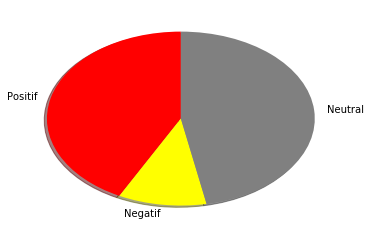

In [91]:
colors = ['red', 'yellow', 'grey']
sizes = [positif, negatif, neutral]
labels = 'Positif', 'Negatif', 'Neutral'

## use matplotlib to plot the chart
plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

plt.show()